<a href="https://colab.research.google.com/github/lydiandiba/Credit-card-Fraud-detection./blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Credit Card Fraud Detection Prediction

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### b) Defining the Metric for Success

Accurate identification of 95% of fraudulent transactions before they are authorized

Precision metric. Proposed as response label is imbalanced

### c) Understanding the context 

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### d) Recording the Experimental Design

Business understanding - understanding the background

Data understanding

Exploratory data analysis

Feature engineering

Data modelling

Model interpretation

### e) Data Relevance

#### Risks
Lack of acceptance of the model by business team due to lack of explainability in detection logic.

Mitigation: To give cost savings benefits will outweigh explainability risk.
#### Constraints
Due to confidentiality, original features and more background information about the data are not provided

Insufficient data - only 2 days of fraud

Outdated data - collected in 2013.
#### Assumptions
Currency is in euros

Data is valid


## 2. Reading the Data

In [0]:
#Data Manipulation Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#Modelling
from sklearn.cluster import KMeans #For creating clusters
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings("ignore")


In [0]:
# Improving visual appearance of graphs
sns.set(rc={'figure.figsize':(13, 10)})

# Ensure all columns are displayed
pd.pandas.set_option('display.max_columns', None)

In [0]:
# Loading the Data from the source i.e. csv
# ---
df = pd.read_csv("creditcard.csv")



## 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
#
df.shape

(39702, 31)

We have 284807 rows and 31 columns in our dataset.

In [0]:
# Previewing the top of our dataset
#
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [0]:
# Previewing the bottom of our dataset
# 
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
39697,39927,-1.466679,2.425732,0.877724,3.950765,0.762477,1.162748,0.575625,-0.288354,-1.357990,2.907686,-0.890614,-0.462249,1.291626,-0.392713,1.434131,-0.347514,-0.124999,-0.270457,0.875010,0.129962,0.186051,0.571010,-0.107517,-0.754306,-0.752828,0.113179,-2.079421,-0.809173,1.50,0.0
39698,39927,-0.523165,-0.100021,0.892966,-1.900405,-0.156870,-0.783894,0.917683,-0.308345,-1.305284,0.514227,0.675557,-1.629259,-2.491738,0.386368,-0.595120,1.352518,-0.228732,-0.936432,0.660506,-0.071640,-0.082504,-0.414677,-0.063392,-0.087455,-0.303383,-0.682889,-0.178417,-0.137169,100.92,0.0
39699,39928,-2.768425,-1.007072,2.151127,0.117797,1.283178,1.869731,-0.562240,0.820374,0.348797,-0.122472,1.700394,1.375019,0.623614,-0.610102,0.577459,-0.941449,0.571209,-1.502828,-0.785017,-0.491556,-0.182963,0.778210,0.904077,-1.288631,0.212441,0.483975,-0.027614,-0.582813,11.99,0.0
39700,39928,1.201327,0.158614,-0.325263,0.471667,0.086446,-0.770357,0.422151,-0.205277,-0.451865,0.161808,1.063432,0.650581,-0.207706,0.742138,0.054512,0.176587,-0.598347,0.093661,0.320508,-0.023074,0.027664,-0.018485,-0.199382,0.053605,0.683829,0.428416,-0.077342,-0.006394,45.00,0.0
39701,39929,1.097669,-1.315782,0.659681,-0.683915,-1.342612,0.332629,-1.110900,0.194811,-0.248825,0.624948,0.324492,-0.279047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39702 entries, 0 to 39701
Data columns (total 31 columns):
Time      39702 non-null int64
V1        39702 non-null float64
V2        39702 non-null float64
V3        39702 non-null float64
V4        39702 non-null float64
V5        39702 non-null float64
V6        39702 non-null float64
V7        39702 non-null float64
V8        39702 non-null float64
V9        39702 non-null float64
V10       39702 non-null float64
V11       39702 non-null float64
V12       39702 non-null float64
V13       39701 non-null float64
V14       39701 non-null float64
V15       39701 non-null float64
V16       39701 non-null float64
V17       39701 non-null float64
V18       39701 non-null float64
V19       39701 non-null float64
V20       39701 non-null float64
V21       39701 non-null float64
V22       39701 non-null float64
V23       39701 non-null float64
V24       39701 non-null float64
V25       39701 non-null float64
V26       39701 non-null float64
V2

In [0]:
# data statistical details
#
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000
mean,25502.432497,-0.213932,0.051942,0.713780,0.189431,-0.231083,0.100915,-0.112981,0.041731,0.214179,-0.071468,0.422693,-0.466401,0.248167,0.238229,0.096748,-0.002226,0.150575,-0.089975,-0.033330,0.047664,-0.029662,-0.112320,-0.040265,0.007226,0.136322,0.023181,0.008097,0.004171,87.445979,0.002620
std,12626.308343,1.831757,1.548373,1.506728,1.399784,1.379431,1.304722,1.244260,1.222742,1.225147,1.124921,1.129000,1.382945,1.145124,1.135287,0.955424,0.926469,1.040934,0.855584,0.816423,0.686521,0.750969,0.638109,0.551644,0.593281,0.435481,0.504830,0.385255,0.298453,234.567447,0.051115
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,-14.166795,-4.049895,-17.769143,-3.808724,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.694584,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,14678.500000,-0.967117,-0.525207,0.233522,-0.717668,-0.835646,-0.638647,-0.597725,-0.152448,-0.555904,-0.552074,-0.393756,-1.330939,-0.524119,-0.262265,-0.464168,-0.490577,-0.344351,-0.564654,-0.524396,-0.162787,-0.236834,-0.534709,-0.178626,-0.325662,-0.128065,-0.330371,-0.063315,-0.006938,7.300000,0.000000
50%,30598.500000,-0.233669,0.101393,0.818163,0.185015,-0.267851,-0.158696,-0.073409,0.048385,0.091864,-0.130457,0.394228,-0.116484,0.171694,0.198534,0.215920,0.062533,0.089306,-0.072462,-0.032766,-0.022270,-0.077298,-0.086811,-0.051646,0.060796,0.176097,-0.063305,0.008394,0.021454,23.430000,0.000000
75%,35625.000000,1.160708,0.743741,1.447844,1.071347,0.297049,0.487010,0.433877,0.314947,0.930712,0.378404,1.209726,0.490027,0.990670,0.817913,0.775941,0.557111,0.579827,0.403895,0.475399,0.168917,0.100244,0.299013,0.076971,0.399378,0.421048,0.304110,0.085116,0.075965,79.000000,0.000000
max,39929.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,12.701539,12.018913,4.846452,4.465413,7.692209,3.832930,6.098529,9.253526,4.295648,4.555359,17.281859,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


Time ranges from 0 to 172,792

Amount spent ranges from 0 to 25691 euros

CLass ranges from 0 to 1. 1 is fraudulent and 0 is valid transaction

### Data Understanding Summary

Dataset has 284807 rows and 31 columns which are already transformed and reduced using PCA. Original features not available with exception of time, amount and class.

All columns are numerical


a) 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

b) 'Amount' is the transaction Amount,which can be used for cost-senstive learning.

c) 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

d) 'V1-V28' may be result of a PCA Dimensionality reduction to protect user identities and sensitive features

## 5. Tidying the Dataset

In [0]:
# Identifying the Missing Data
#
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

We dont have any missing values in our dataset.


In [0]:
# Checking for duplicates
#
df.duplicated().sum()

179

The fact that the dataset has amount, time and credit card specific details implies that there should be no duplicates. If any are found, possibility of fraud transactions.

In [0]:
# Viewing our duplicates

df[df.duplicated()][0:10]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0.0
35,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0.0
113,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
114,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
115,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
221,145,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,0.158497,-1.224951,1.314705,0.304412,-0.290218,-2.014548,-0.772801,0.696761,0.017914,2.177250,-0.276207,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0.0
223,145,-2.419486,1.949346,0.552998,0.982710,-0.284815,2.411200,-1.398537,-0.188922,0.675695,0.158123,-1.224834,1.314398,0.304425,-0.290434,-2.014511,-0.772540,0.696610,0.017855,2.177312,-0.277406,1.213390,-1.238354,0.007191,-1.724175,0.239721,-0.313607,-0.187431,0.119472,6.74,0.0
1178,919,0.904289,-0.538055,0.396058,0.500680,-0.864473,-0.657199,0.027231,-0.029473,0.265447,-0.110991,1.254250,0.704631,-0.967461,0.466524,-0.303979,0.094702,-0.198326,-0.124616,0.401377,0.157346,-0.099460,-0.597579,-0.048666,0.551824,0.182934,0.402176,-0.081357,0.027252,158.00,0.0
1180,919,1.207596,-0.036860,0.572104,0.373148,-0.709633,-0.713698,-0.181105,0.011277,0.283940,-0.037866,1.252000,0.698164,-0.995452,0.430980,-0.323729,0.073995,-0.202981,-0.156783,0.451522,-0.162378,-0.194591,-0.514717,0.089714,0.543768,0.240581,0.418921,-0.051693,-0.000085,1.00,0.0
1382,1074,-2.248488,-0.195670,0.026949,-0.525780,-0.238759,-0.033359,0.162196,0.928520,-0.424215,-1.133001,-0.529027,0.142246,-0.931195,0.923712,-0.750816,0.919012,-0.565837,0.547431,0.516124,-0.082562,-0.032208,-0.745757,-0.243193,-0.821633,-0.030402,0.335838,-0.286998,-0.243768,158.00,0.0


Some of the values above seem valid e.g row 221 and 223. In most cases, it's the time that is duplicated and other values are not. It's acceptable to have more than one transaction logged at same time.

Some values e.g row 114 and 115 at time 74 seem like real duplicates. Nevertheless, we will not drop them. An engagement with product owner to find the causes for the duplicates to advise further action.

Since this is a fraud scenario, a duplicate record is likely to be fraud case as well so it's important we don't drop the duplicates arbitrarly

In [0]:
# Checking Data Errors
# Transactions with amount zero

print('Records with zero values group by class')
print(df[df['Amount']==0].groupby("Class")['Class'].count())
df[df['Amount']==0][0:10]

Records with zero values group by class
Class
0.0    346
1.0      3
Name: Class, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,-0.059943,-0.508270,0.425506,0.414309,-0.698375,-1.465349,-0.119009,-0.144735,-1.332221,-1.547440,-0.133602,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0.0
514,380,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,0.241979,0.144973,-0.583891,-1.595345,0.032613,0.752834,-0.094286,-0.163427,-1.111176,-1.124025,0.065979,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0.0
534,403,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,0.511284,-0.178159,0.762909,1.700923,-0.133861,0.402418,0.684668,-0.609395,-0.704277,-0.720726,-0.006716,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1.0
575,430,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,-0.371622,0.859741,0.372609,-1.240185,0.998391,-0.346387,-0.391679,0.348289,0.282125,1.165893,0.320450,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0.0
936,711,-0.431349,1.027694,2.670816,2.084787,-0.274567,0.286856,0.152110,0.200872,-0.596505,0.022224,-0.993674,0.244681,0.711846,-0.666973,-0.600267,0.480204,-0.438582,-0.119475,-0.681539,-0.057886,0.001241,0.154170,-0.141533,0.384610,-0.147132,-0.087100,0.101117,0.077944,0.0,0.0
1059,804,1.181697,-0.007908,-0.066845,1.532223,1.728832,4.409885,-1.138816,1.164645,-0.020578,0.554216,-0.729227,-0.010698,-0.013586,-0.272330,-0.114823,0.947451,-0.914655,0.245244,-0.469550,-0.040382,-0.139920,-0.399563,0.010200,0.992235,0.457015,-0.027924,0.045273,0.028868,0.0,0.0
1072,820,-0.937481,0.401649,1.882689,-0.362001,0.751088,-0.899262,0.880557,-0.181650,-0.211657,-0.666699,-0.343746,-0.429064,-1.325857,0.100213,-0.143886,-0.613434,0.130665,-0.988969,-0.829912,-0.056409,-0.001757,0.097379,-0.324050,0.436521,0.509674,0.454116,-0.201804,-0.175439,0.0,0.0
1170,912,1.083003,0.201589,1.497664,2.661922,-0.621256,0.618554,-0.644140,0.310919,0.125964,0.453240,-0.755020,0.184041,-0.107569,-0.361091,-0.037247,0.334321,-0.129615,-0.633848,-1.199578,-0.203726,-0.060433,0.009647,0.077072,0.072141,0.220747,-0.013483,0.058596,0.032054,0.0,0.0
1526,1193,1.130646,0.625391,0.837987,2.506543,-0.107116,-0.245548,0.099603,-0.041457,-0.867319,0.623165,0.111591,0.503149,0.727329,0.174358,0.684883,0.293412,-0.288419,-0.952503,-1.491590,-0.153060,-0.017154,-0.014311,0.086559,0.393496,0.332062,-0.066378,0.013858,0.025382,0.0,0.0


1825 transaction had zero amount of which 1798 transactions were valid while 27 of these were marked as fraudulent transactions.

In [0]:
# Transactions with negative amount or time

print("Negative Amount",df[df['Amount']<0]['Amount'].count())
print("Negative Time",df[df['Time']<0]['Time'].count())

Negative Amount 0
Negative Time 0


No transactions have negative amount.

### Outliers

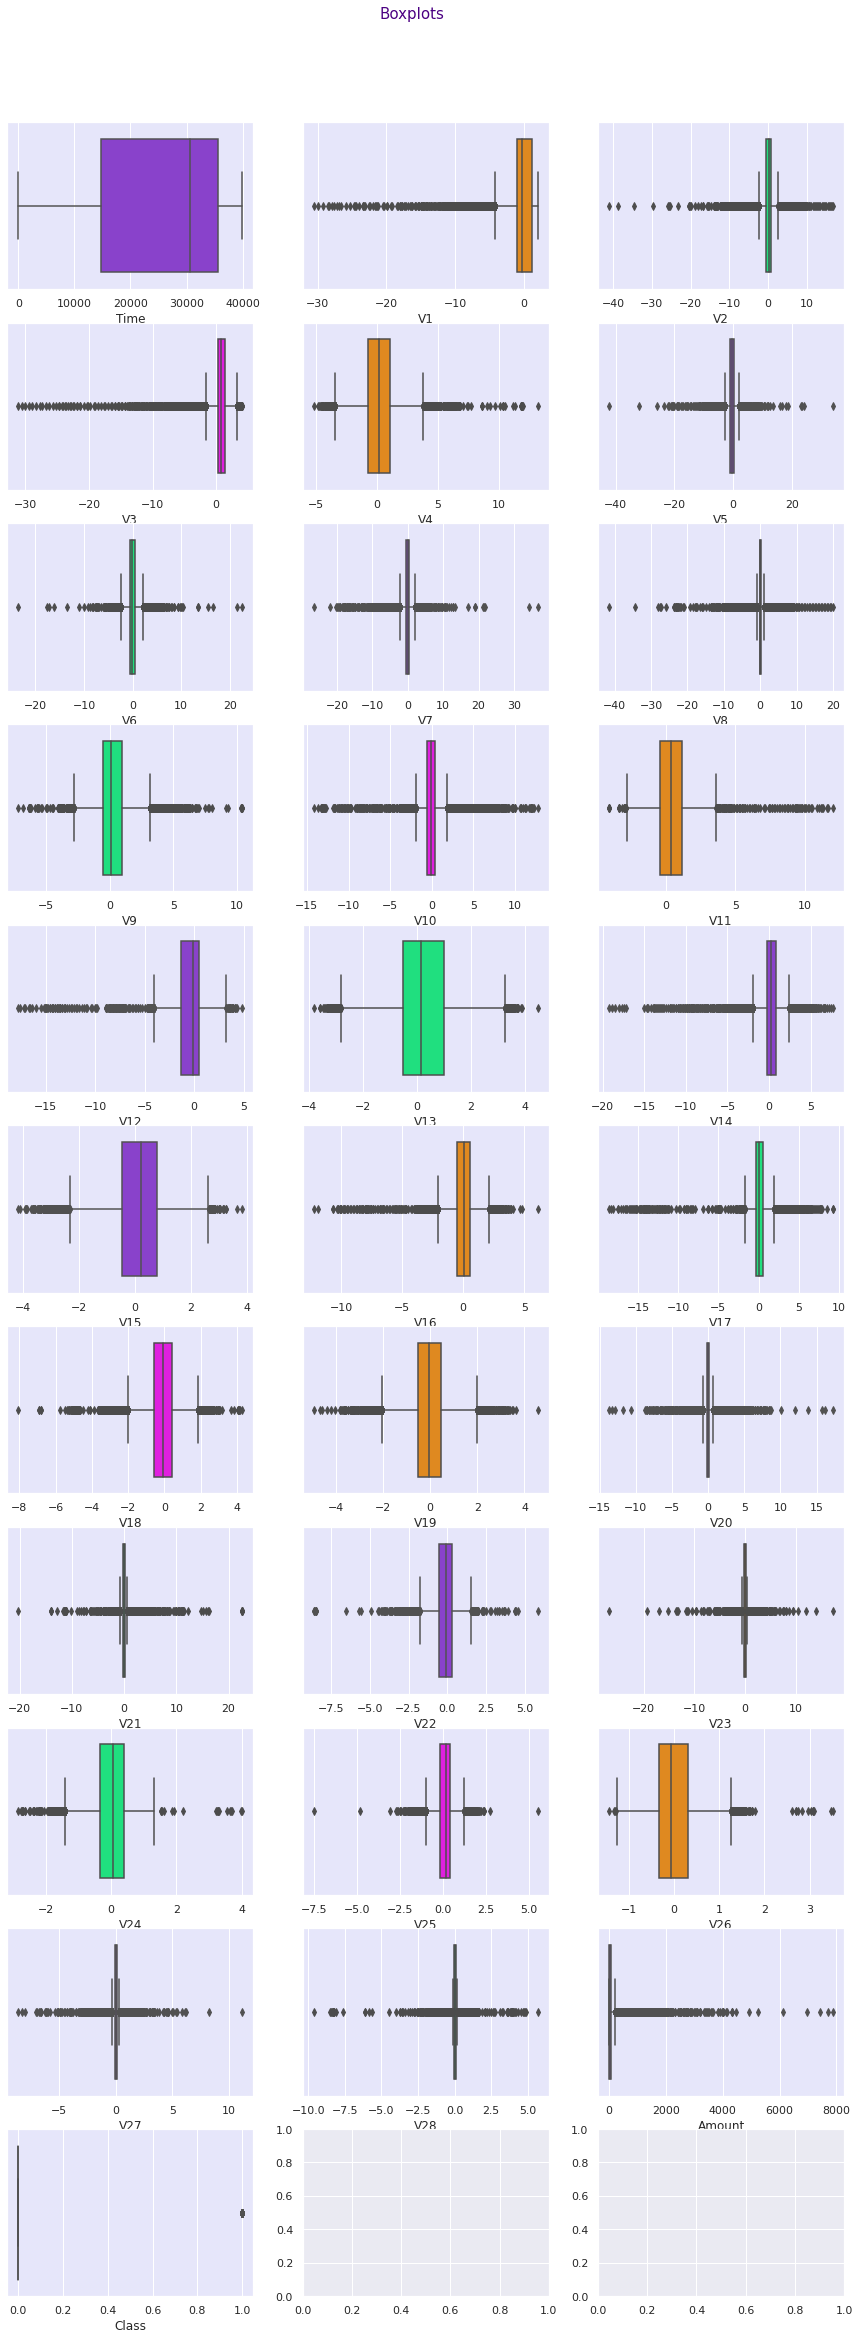

In [0]:
# Boxplots
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia', 'darkorange', 'blueviolet', 'springgreen','blueviolet', 'darkorange', 'springgreen', 'fuchsia', 'darkorange', 'blueviolet', 'springgreen','blueviolet',
         'blueviolet', 'darkorange', 'springgreen', 'fuchsia', 'darkorange', 'blueviolet', 'springgreen','blueviolet', 'darkorange', 'springgreen', 'fuchsia', 'darkorange', 'blueviolet', 'springgreen','blueviolet',
         'blueviolet', 'darkorange', 'springgreen']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 11, ncols = 3, figsize = (15, 40))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
  sns.boxplot(df[column], ax = ax, color = color)
  ax.set_facecolor('lavender') # Setting the background color to lavender

## 6. Exploratory Analysis

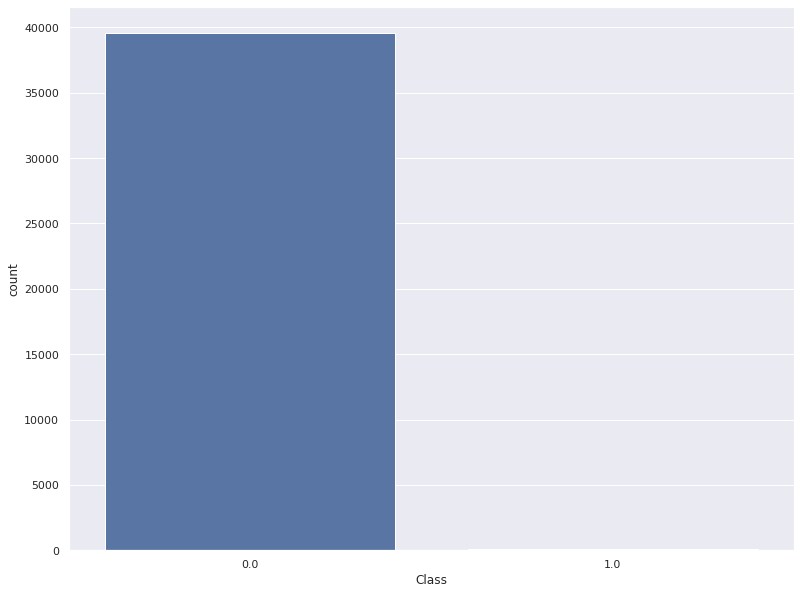

0.0    39597
1.0      104
Name: Class, dtype: int64


In [0]:
# visualizing how many fraud cases we have

sns.countplot(df.Class)
plt.show()
print(df.Class.value_counts())

We have a highly imbalanced dataset. the total number of normal transactions is 284315 while fraud transactions are 492.

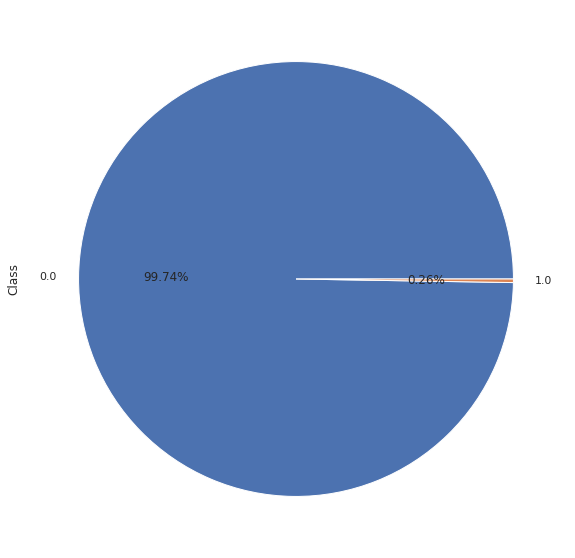

,Target,Count,percent
0,0.0,39597,99.74
1,1.0,104,0.26


In [0]:
# Pie chart to display class values
sns.set_style('whitegrid')
df['Class'].value_counts().plot(kind='pie', subplots=True,autopct='%1.2f%%')
plt.show()
d = df.Class.value_counts()


# calculating the total percentage of our transactions
imbal = df['Class'].value_counts().to_frame().reset_index()
imbal['percent'] = imbal["Class"].apply(lambda x : round(100*float(x) / len(df), 2))
imbal = imbal.rename(columns = {"index" : "Target", "Class" : "Count"})
imbal

In [0]:
# calculating the total percentage of our transactions
#
a = df['Class'].value_counts().to_frame().reset_index()
a['percent'] = a["Class"].apply(lambda x : round(100*float(x) / len(df), 2))
a = a.rename(columns = {"index" : "Target", "Class" : "Count"})
a

,Target,Count,percent
0,0,284315,99.83
1,1,492,0.17


The dataset is highly unbalanced, the frauds account for 0.17% of all transactions.

Only Time and Amount have not been transformed with PCA. Time contains the seconds elapsed between each transaction and the first transaction in the dataset. Lets transofrm this feature into hours to get a better understanding.

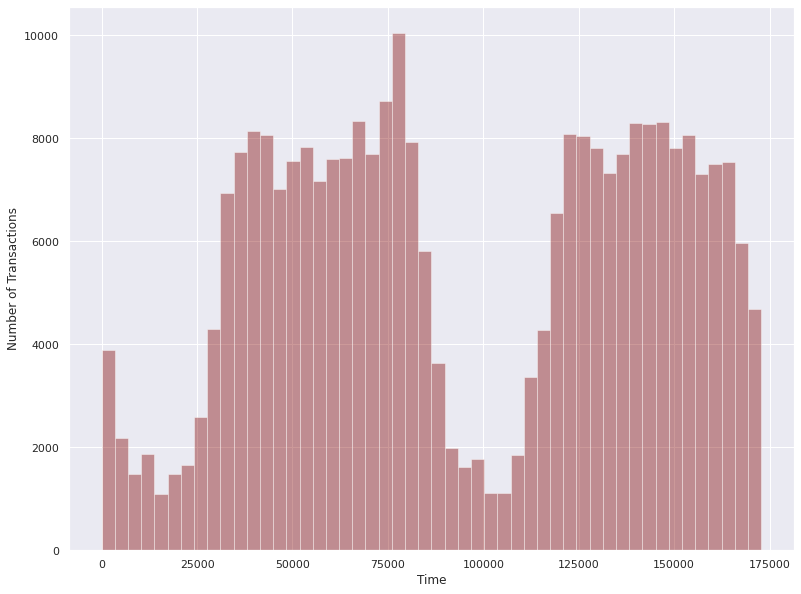

In [0]:
# Disibution of time
#
fig = sns.distplot(df['Time'], kde=False, color="maroon")
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.show()


In [0]:
# Feature Engineering

# Converting time to hours
#
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)


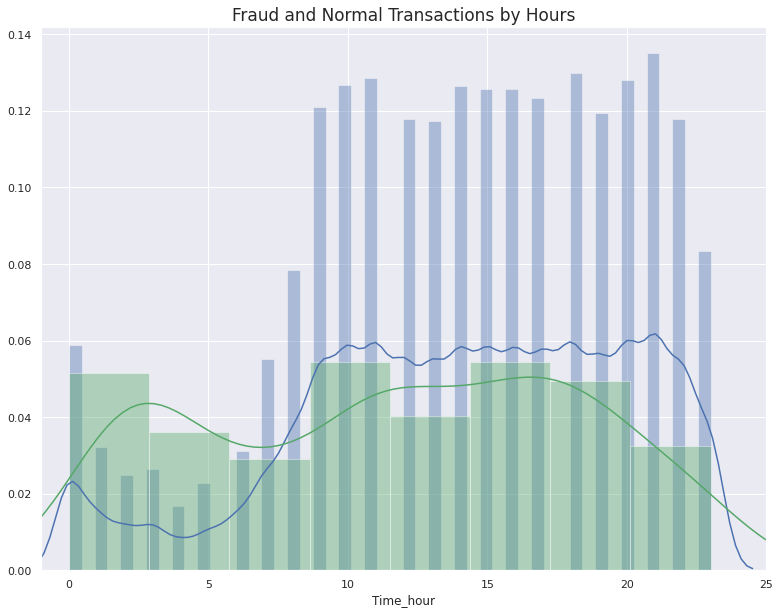

In [0]:
# plotting our transactions per hour
#
sns.distplot(df[df['Class'] == 0]["Time_hour"], color='b')
sns.distplot(df[df['Class'] == 1]["Time_hour"], color='g')
plt.title('Fraud and Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

We see that the hour of day had some impact on number or fraud cases. Most fraudulent transaction happened between hours 10 and 13.

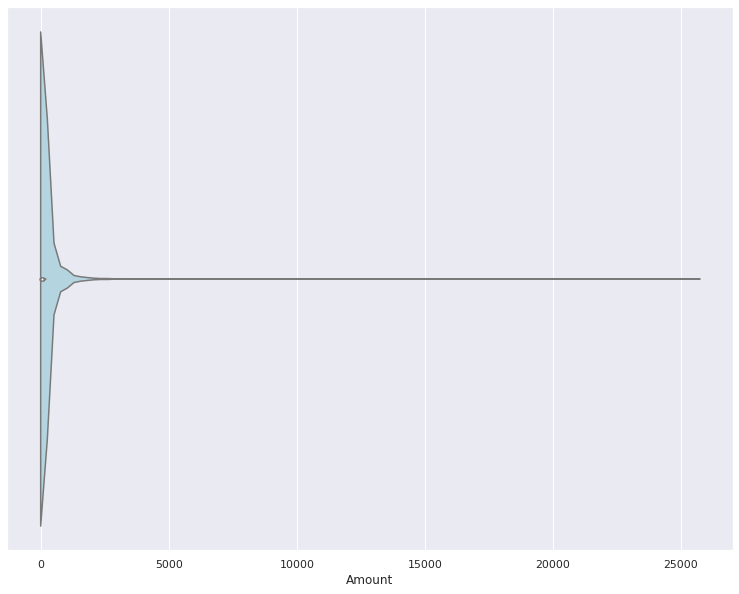

In [0]:
# Distribution of amount
#
fig = sns.violinplot(x=df["Amount"], color="lightblue")
plt.show()

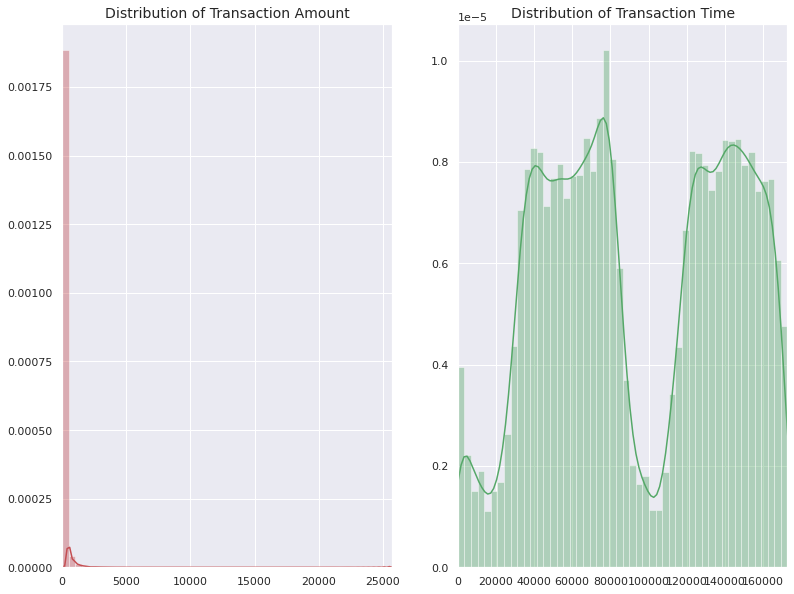

In [0]:
# plotting the distribution for both amount and time 

fig, ax = plt.subplots(1, 2)

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='g')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [0]:
# Seperating the fraud transactions to the normal transactions
#
Fraud = df[df['Class']==1]

Normal = df[df['Class']==0]

In [0]:
#Group by Time
Fraud.groupby('Time')['Time'].count().sort_values(ascending=False)

Time
68207.0     6
93879.0     4
84204.0     4
85285.0     4
93860.0     4
           ..
102480.0    1
102489.0    1
102542.0    1
102572.0    1
406.0       1
Name: Time, Length: 468, dtype: int64

In [0]:
#Group by Time
Normal.groupby('Time')['Time'].count().sort_values(ascending=False)

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
92555.0      1
92554.0      1
92550.0      1
92548.0      1
86123.0      1
Name: Time, Length: 124479, dtype: int64

In [0]:
#Group by Amount
Fraud.groupby('Amount')['Amount'].count().sort_values(ascending=False)

Amount
1.00      113
0.00       27
99.99      27
0.76       17
0.77       10
         ... 
170.92      1
156.00      1
153.46      1
147.87      1
88.00       1
Name: Amount, Length: 259, dtype: int64

In [0]:
#Group by Amount
Normal.groupby('Amount')['Amount'].count().sort_values(ascending=False)

Amount
1.00        13575
1.98         6044
0.89         4872
9.99         4746
15.00        3280
            ...  
321.23          1
321.25          1
321.26          1
123.59          1
25691.16        1
Name: Amount, Length: 32701, dtype: int64

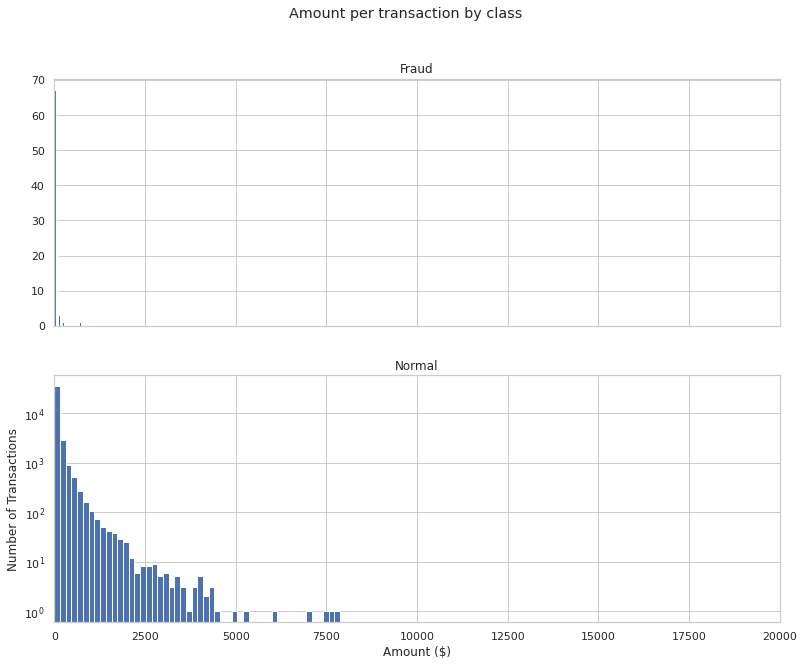

In [0]:
# Transaction amounts per fraud or not fraud classes

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(df[df['Class']==1]['Amount'], bins = 50)
ax1.set_title('Fraud')
ax2.hist(df[df['Class']==0]['Amount'], bins = 50)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

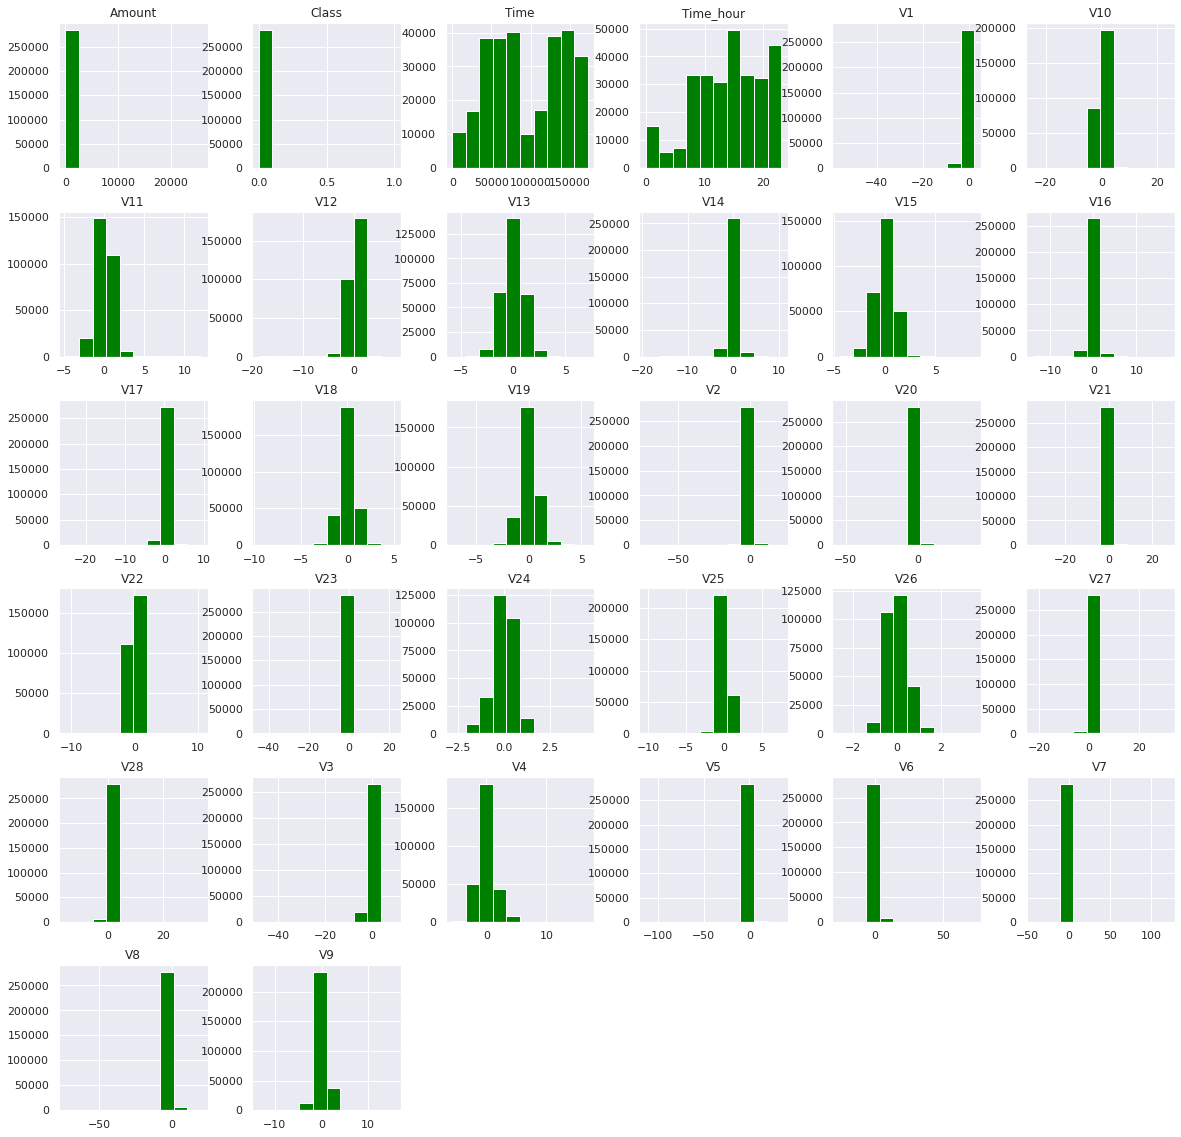

In [0]:
# ploting a histogram for our variables

df.hist(figsize=(20,20), color = "green")
plt.show()

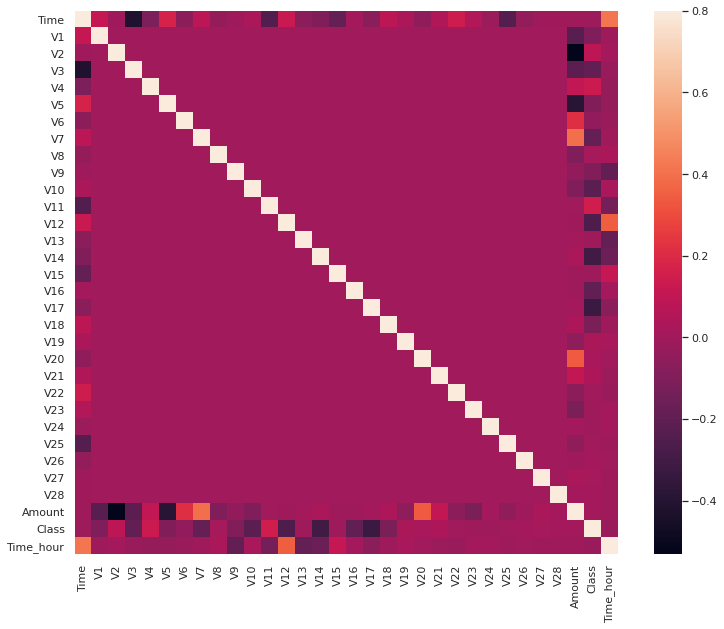

In [0]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

The above correlation matrix shows that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.



## 7. Implementing the Solution

## K-means

In [0]:
# Implementing the Solution
# Removing the class label
# Dependent Variable
class_label = df['Class']

# Independent Variables
df_features = df.drop(['Class'], axis=1)
df_features.head()

# Determine Number Of Fraud Cases In DataSet
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]


Determine optimal number of K clusters using Elbow method used.
Train multiple models using a different number of clusters and storing the value of the intertia_ property every time.

In [0]:
# Using Elbow method to determine number of clusters we will use
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=15)
    kmeans.fit(df_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

ValueError: ignored

We will use 2 clusters as the graph curves at value 2.

## Baseline KMeans Model

In [0]:
# fitting our kmeans and plotting a scatter plot with the 2 clusters

kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
pred_y = kmeans.fit_predict(df_features) #fit_predict

#Categorize the data using the optimum number of clusters
plt.scatter(df_features.iloc[:,0], df_features.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

ValueError: ignored

ERROR! Session/line number was not unique in database. History logging moved to new session 59


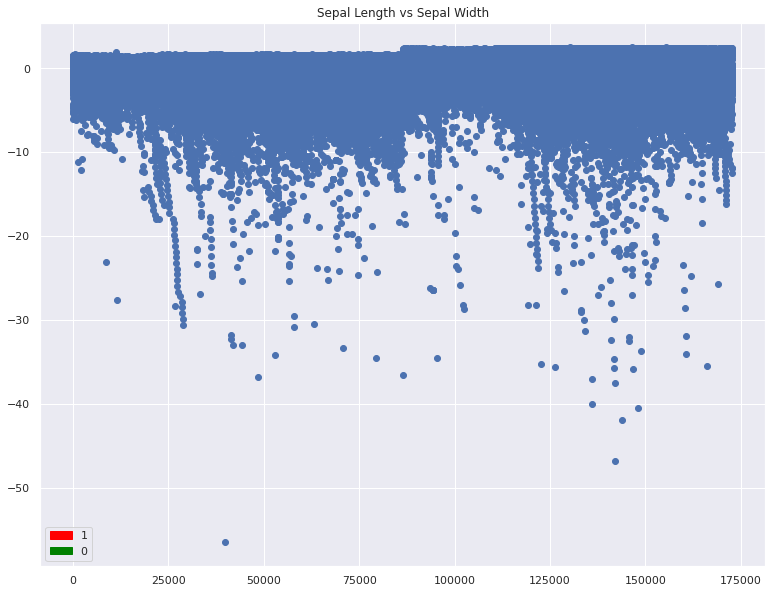

In [0]:
#Calculate correct prediction
correct = 0
for i in range(len(class_label)):
    if pred_y[i] == class_label[i] and pred_y[i] ==1:
        correct += 1
print("Correct: ", correct, " Fraud", len(Fraud))
print(correct/len(Fraud))


#plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch])


In [0]:
#Calculate correct prediction
correct = 0
for i in range(len(y)):
    if pred_y[i] == y[i]:
        correct += 1

print(correct/len(y))

0.4628116584213169


In [0]:
# normaizing our data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Split the data into train set and test set
train,test = train_test_split(df,test_size=0.3,random_state=20)

# Get the arrays of features and labels in train dataset
X_train = train.drop(['Time','Class'],axis=1)
X_train = X_train.values
y_train = pd.DataFrame(train[['Class']])
y_train = y_train.values

# Get the arrays of features and labels in test dataset
X_test = test.drop(['Time','Class'],axis=1)
X_test = X_test.values
y_test = pd.DataFrame(test[["Class"]])
y_test = y_test.values

# Normalize the features in both train and test dataset
X_train = normalize(X_train)
X_test = normalize(X_test)

In [0]:
kmeans=KMeans(n_clusters=2,random_state=20,algorithm="elkan",max_iter=10000,n_jobs=-1)
kmeans.fit(df.loc[:, df.columns != 'Class'])
X_train_normal = kmeans.cluster_centers_


In [0]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

model = KMeans(n_clusters=2,random_state=0)
model.fit(X_train)
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

# Decide if model predicted label is aligned with true label 
true_negative,false_positive,false_negative,true_positive = confusion_matrix(y_train,y_train_predicted).ravel()
reassignflag = true_negative + true_positive < false_positive + false_negative
print(reassignflag)


y_test_predicted = 1- y_test_predicted

True


In [0]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score
# Calculating confusion matrix for kmeans
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_predicted))

# Scoring kmeans

print('kmeans_precison_score:', precision_score(y_test,y_test_predicted))
print('kmeans_recall_score:', recall_score(y_test,y_test_predicted))
print('kmeans_accuracy_score:', accuracy_score(y_test,y_test_predicted))
print('kmeans_f1_score:',f1_score(y_test,y_test_predicted))

Confusion Matrix:
 [[51109 34198]
 [   70    66]]
kmeans_precison_score: 0.0019262199392948867
kmeans_recall_score: 0.4852941176470588
kmeans_accuracy_score: 0.598937303231394
kmeans_f1_score: 0.0038372093023255815


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [0]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?